In [1]:
from pystac_client import Client
from odc.stac import load

In [2]:
catalog = "https://stac.staging.digitalearthpacific.org"
client = Client.open(catalog)

In [3]:
fiji_bbox = [177.2, -18.4, 178.9, -17.2]
datetime = "2023"

items = list(client.search(collections=["dep_s1_mosaic"], bbox=fiji_bbox, datetime=datetime).items())

print(f"Found {len(items)} items")

Found 5 items


In [5]:
data = load(items, bbox=fiji_bbox, resolution=100, chunks={}).squeeze()
data

<xarray.Dataset>
Dimensions:       (y: 1396, x: 1894)
Coordinates:
  * y             (y) float64 -1.931e+06 -1.932e+06 ... -2.071e+06 -2.071e+06
  * x             (x) float64 3.028e+06 3.028e+06 ... 3.217e+06 3.217e+06
    spatial_ref   int32 3832
    time          datetime64[ns] 2023-01-01
Data variables:
    std_vh        (y, x) float32 dask.array<chunksize=(1396, 1894), meta=np.ndarray>
    std_vv        (y, x) float32 dask.array<chunksize=(1396, 1894), meta=np.ndarray>
    mean_vh       (y, x) float32 dask.array<chunksize=(1396, 1894), meta=np.ndarray>
    mean_vv       (y, x) float32 dask.array<chunksize=(1396, 1894), meta=np.ndarray>
    median_vh     (y, x) float32 dask.array<chunksize=(1396, 1894), meta=np.ndarray>
    median_vv     (y, x) float32 dask.array<chunksize=(1396, 1894), meta=np.ndarray>
    std_vv_vh     (y, x) float32 dask.array<chunksize=(1396, 1894), meta=np.ndarray>
    mean_vv_vh    (y, x) float32 dask.array<chunksize=(1396, 1894), meta=np.ndarray>
    median_vv_vh  (y, x) float32 dask.array<chunksize=(1396, 1894), meta=np.ndarray>

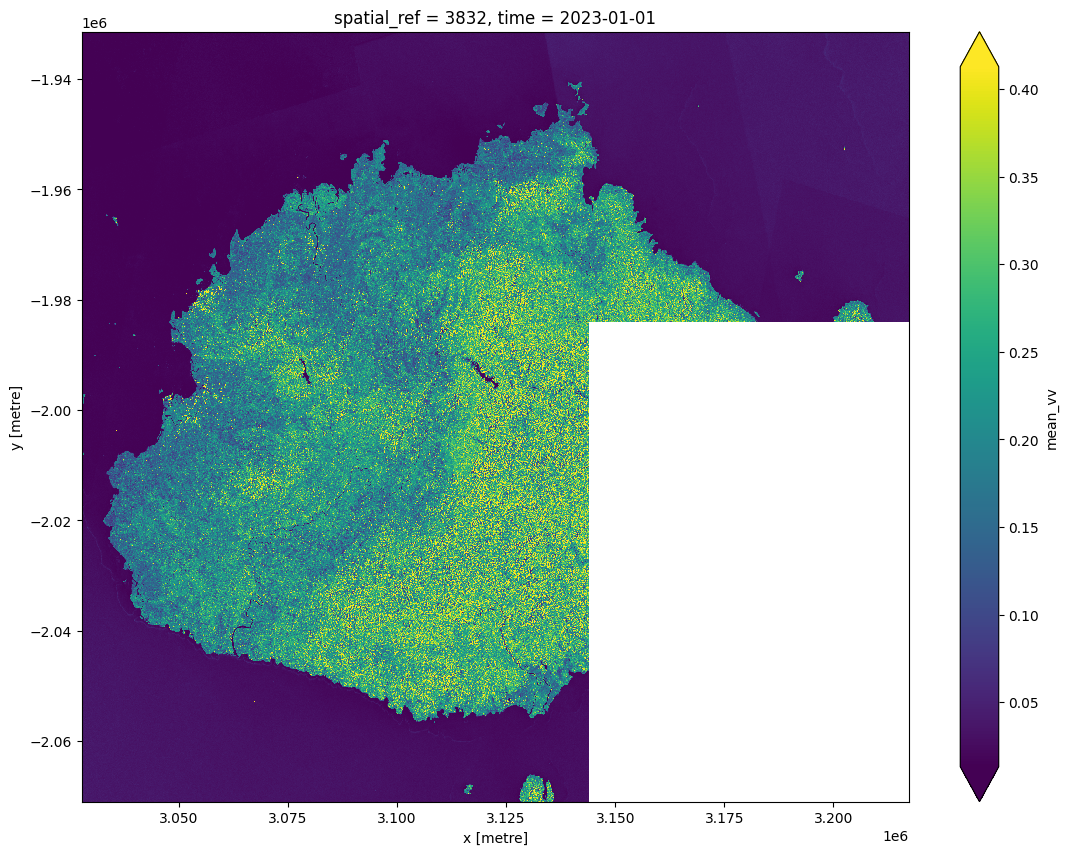

In [7]:
data.mean_vv.plot.imshow(size=10, robust=True)